In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot, ROOT

Welcome to JupyROOT 6.14/04


In [2]:
'''
install the the package:
1. conda install uproot
2. pip install uproot

uproot tutorial:
https://masonproffitt.github.io/uproot-tutorial/
'''

'\ninstall the the package:\n1. conda install uproot\n2. pip install uproot\n\nuproot tutorial:\nhttps://masonproffitt.github.io/uproot-tutorial/\n'

In [21]:
# generate nevt numpy arrays with gaussian distribution
nevt = 10000
np.random.seed(1000)
npXval = np.random.normal(size=nevt, loc=0.0)
npYval = np.random.normal(size=nevt, loc=0.0)
npZval = np.sqrt(npXval**2 +  npYval**2)
print(npXval)


[-0.8044583   0.32093155 -0.02548288 ... -0.06434491  0.50570314
 -1.63094421]


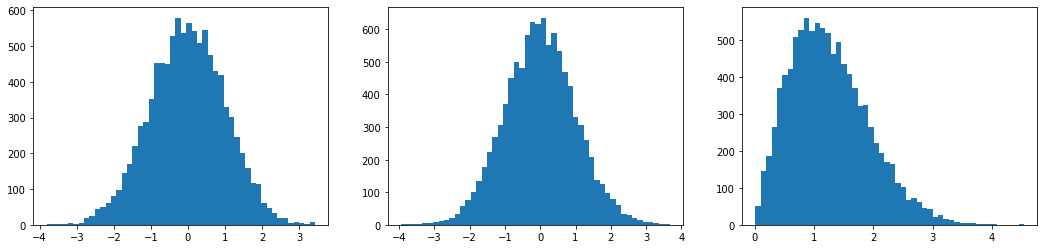

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs[0].hist(npXval, bins=50)
axs[1].hist(npYval, bins=50)
axs[2].hist(npZval, bins=50)
plt.show()

In [23]:
# create a test root file
tfile = ROOT.TFile("testFile_rootPython.root", "RECREATE")

# create a tree to fill
tr = ROOT.TTree("testTree", "test tree")
xval = np.empty((1), dtype="float32")
yval = np.empty((1), dtype="float32")
zval = np.empty((1), dtype="float32")
tr.Branch("xval", xval, "xval/F")
tr.Branch("yval", yval, "yval/F")
tr.Branch("zval", zval, "zval/F")

for ievt in range(nevt):
    xval[0] = npXval[ievt]
    yval[0] = npYval[ievt]
    zval[0] = npZval[ievt]
    tr.Fill()
    
tfile.Write()
tfile.Close()